In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import pandas as pd

from src.data.load_data import load_uci_dataset
from src.linear_algebra.svd_core import compute_truncated_svd
from src.visualization.svd_plots import (
    plot_singular_values,
    plot_variance_explained
)


In [2]:
X = pd.read_csv(r"../Data/processed/X_processed.csv")
y = pd.read_csv(r"../Data/processed/labels.csv").iloc[:, 0]

X = X.values  # Convert to NumPy for speed

In [3]:
U_reduced, singular_values, svd_model = compute_truncated_svd(
    X,
    n_components=50
)

print("Reduced representation shape:", U_reduced.shape)


Reduced representation shape: (801, 50)


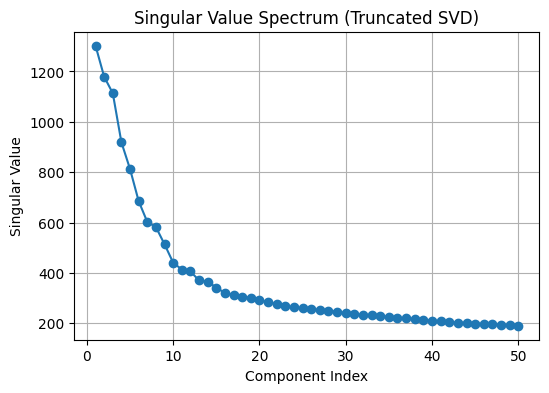

In [8]:
plot_singular_values(
    singular_values,
    save_path="../results/figures/svd_scree_plot.png"
)


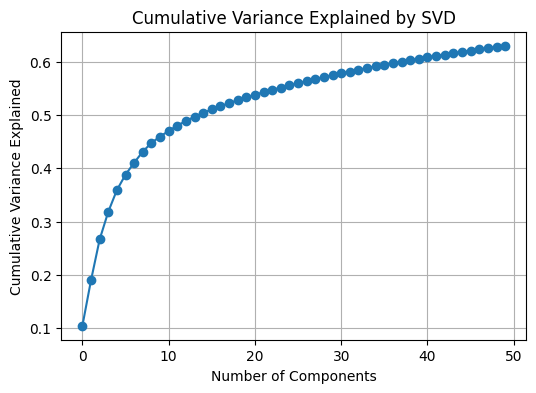

In [7]:
plot_variance_explained(
    svd_model,
    save_path="../results/figures/svd_variance_explained.png"
)


In [9]:
variance_table = pd.DataFrame({
    "component": range(1, len(singular_values) + 1),
    "singular_value": singular_values,
    "explained_variance_ratio": svd_model.explained_variance_ratio_
})

variance_table.to_csv(
    "../results/tables/variance_explained.csv",
    index=False
)

variance_table.head()


,component,singular_value,explained_variance_ratio
0,1,1302.063643,0.104450
1,2,1178.782758,0.085607
2,3,1113.496047,0.076387
3,4,918.546485,0.051981
4,5,812.368950,0.040658
